# README FILE:
# Dataset Analysis

Today, pollution from the transport sector accounts for 60.6% of total polution in Europe. That's why so many people are wondering whether they should buy a car to reduce polution. In this dataset, we'll look at the different parameters that increase vehicle pollution, and how to choose the least polluting car possible.
## The Data
- **What are the data?**  
  This dataset contains information about Cars, like their CO2 emissions, but also their horsepower, if they are hybrid or not, etc...

- **Where do they come from?**  
  https://www.data.gouv.fr/fr/datasets/emissions-de-co2-et-de-polluants-des-vehicules-commercialises-en-france/

- **Data provenance:**  
  The provenance of the data is https://www.data.gouv.fr/fr/datasets/emissions-de-co2-et-de-polluants-des-vehicules-commercialises-en-france/ which is the web site of the French government. It provides lots information about France.

- **Census or sample:**  
  it's a sample by Cars.

- **Raw or processed:**  
  processed because we removed lots of columns like lib-mob-doss which was representing the name of the model in the administrative file or the date because all the datas are from march 2014.


- **Describe the units, size of the sample/population:**  
  - **Units:** Each row represents one different Cars.  
  - **Population/Sample size:**  5504 Cars.

- **Number of variables:**  
  11 columns (variables).

## Variables Description


1. **`lib_mrc`**  
   This variable represents the brand name of the Car. It is a categorical variable.

2. **`lib_mod	`**  
   It represents the model name of the Car. It is a categorical variable.

3. **`cnit`** 
    The CNIT, or Code National d'Identification du Type (National Type Identification Code), is a code created by the manufacturer and then approved by the French government to identify the vehicle model defined by its technical characteristics (engine, version, etc.).
    It is shown in box D.2 of the vehicle registration certificate. It is a categorical variable.
4. **`cod_cbr`** 
    This variable reprensents the fuel code, that's the fuel name used to power the car. In the data set, here are some examples 'ES' for petrol or 'GO' for diesel, 'EE' for ethanol, 'GP' for LPG etc... It is a categorical variable.
5. **`hybride`** 
    This variable shows if a car is hybride or not. The two outputs are 'yes' or 'no'. It is a categorical variable.
6. **`Puissadmin`** 
    This variable represents the administrative horsepower (or fiscal horsepower) is a value expressed in fiscal horsepower (HP), used in France to calculate the cost of vehicle registration (carte grise), and in some cases for insurance purposes. It is a discrete variable that goes from 1 to 81hp.
7. **`puiss_max`** 
    It represents the maximum power of the car. It is a discrete variable that goes from 10 to 560 hp
8. **`typ_boite_nb_rapp`** 
    It represents the type of gearbox of the car. It's a categorical variable. There is a letter followed by a number. the letter is the type of Gearbox, like 'M' for Manual, and the number is the number of gear ratios.
9. **`conso_mixte`** 
   This varaible represents the average consumption of the car in L/100 Km. It's a continuous variable that goes from 0.6 to 24.5 L/100 Km.
10. **`C02`**
   This varaible represents the C02 emissions of the Car in g/km. it's a continuous variable that goes from 13 to 572 g/Km.
11. **`masse_ordma_max`**
   This variable shows the weight of the car with full tank, the oil, all the options,... the maximum weight of the car. It's a continuous variable that goes from 825 to 3094 Kg.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import jupyprint as jp



In [2]:
df=pd.read_csv("mars-2014-complete.csv", on_bad_lines='skip', sep=';')
df

,lib_mrq,lib_mod_doss,lib_mod,dscom,cnit,tvv,cod_cbr,hybride,puiss_admin_98,puiss_max,...,masse_ordma_min,masse_ordma_max,champ_v9,date_maj,Carrosserie,gamme,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C,ES,non,12,147,...,1505,1505,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000H341,939BXN1B53C,ES,non,12,147,...,1555,1555,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64,GO,non,7,100,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000F303,939AXR1B64B,GO,non,7,100,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000G304,939AXS1B66,GO,non,9,125,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55039,VOLVO,XC70,XC70,XC70 D4 4cyl (181ch) Stop&Start Geartronic 8,M10VLVVP900U606,BZ73CD,GO,non,10,133,...,1755,1755,715/2007*195/2013EURO6,mars-14,BREAK,SUPERIEURE,NaN,NaN,NaN,NaN
55040,VOLVO,XC70,XC70,XC70 D4 5cyl (181ch) AWD Geartronic 6,M10VLVVP900V607,BZ8156,GO,non,11,133,...,1799,1799,715/2007*630/2012EURO5,mars-14,BREAK,SUPERIEURE,NaN,NaN,NaN,NaN
55041,VOLVO,XC70,XC70,XC70 D5 (215ch) AWD Geartronic 6,M10VLVVP872R581,BZ8256,GO,non,13,158,...,1798,1798,715/2007*630/2012EURO5,mars-14,BREAK,SUPERIEURE,NaN,NaN,NaN,NaN
55042,VOLVO,XC70,XC70,XC70 D5 (215ch) Stop&Start AWD BVM6,M10VLVVP8723582,BZ83A4,GO,non,12,158,...,1788,1788,715/2007*630/2012EURO5,mars-14,BREAK,SUPERIEURE,NaN,NaN,NaN,NaN


In [3]:
df.shape[0]

55044

In [4]:
df.shape[1]

30

In [5]:
df.columns

Index(['lib_mrq', 'lib_mod_doss', 'lib_mod', 'dscom', 'cnit', 'tvv', 'cod_cbr',
       'hybride', 'puiss_admin_98', 'puiss_max', 'typ_boite_nb_rapp',
       'conso_urb', 'conso_exurb', 'conso_mixte', 'co2', 'co_typ_1', 'hc',
       'nox', 'hcnox', 'ptcl', 'masse_ordma_min', 'masse_ordma_max',
       'champ_v9', 'date_maj', 'Carrosserie', 'gamme', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29'],
      dtype='object')

In [6]:
df.dtypes

lib_mrq               object
lib_mod_doss          object
lib_mod               object
dscom                 object
cnit                  object
tvv                   object
cod_cbr               object
hybride               object
puiss_admin_98         int64
puiss_max             object
typ_boite_nb_rapp     object
conso_urb             object
conso_exurb           object
conso_mixte           object
co2                  float64
co_typ_1              object
hc                    object
nox                   object
hcnox                 object
ptcl                  object
masse_ordma_min        int64
masse_ordma_max        int64
champ_v9              object
date_maj              object
Carrosserie           object
gamme                 object
Unnamed: 26          float64
Unnamed: 27          float64
Unnamed: 28          float64
Unnamed: 29          float64
dtype: object

In [7]:

df.isnull().sum()


lib_mrq                  0
lib_mod_doss             0
lib_mod                  0
dscom                    0
cnit                     0
tvv                      0
cod_cbr                  0
hybride                  0
puiss_admin_98           0
puiss_max                0
typ_boite_nb_rapp        0
conso_urb               43
conso_exurb             43
conso_mixte             34
co2                     34
co_typ_1               158
hc                   45271
nox                    158
hcnox                 9888
ptcl                  2678
masse_ordma_min          0
masse_ordma_max          0
champ_v9                61
date_maj             51797
Carrosserie              0
gamme                    0
Unnamed: 26          55044
Unnamed: 27          55044
Unnamed: 28          55044
Unnamed: 29          55044
dtype: int64

In [8]:
df['conso_mixte'] = df['conso_mixte'].replace('[\$,]', '', regex=True).astype(float)
df['conso_mixte'] = df['conso_mixte'].fillna(df['conso_mixte'].median())

In [9]:

df.isnull().sum()

lib_mrq                  0
lib_mod_doss             0
lib_mod                  0
dscom                    0
cnit                     0
tvv                      0
cod_cbr                  0
hybride                  0
puiss_admin_98           0
puiss_max                0
typ_boite_nb_rapp        0
conso_urb               43
conso_exurb             43
conso_mixte              0
co2                     34
co_typ_1               158
hc                   45271
nox                    158
hcnox                 9888
ptcl                  2678
masse_ordma_min          0
masse_ordma_max          0
champ_v9                61
date_maj             51797
Carrosserie              0
gamme                    0
Unnamed: 26          55044
Unnamed: 27          55044
Unnamed: 28          55044
Unnamed: 29          55044
dtype: int64

In [10]:
df.describe()

,puiss_admin_98,conso_mixte,co2,masse_ordma_min,masse_ordma_max,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
count,55044.000000,5.504400e+04,55010.000000,55044.000000,55044.000000,0.0,0.0,0.0,0.0
mean,10.551504,5.518708e+09,201.707035,2102.104553,2341.021801,NaN,NaN,NaN,NaN
std,5.126021,3.443115e+09,33.976278,294.731715,424.067895,NaN,NaN,NaN,NaN
min,1.000000,3.000000e+00,13.000000,825.000000,825.000000,NaN,NaN,NaN,NaN
25%,9.000000,1.190000e+09,193.000000,1982.000000,2075.000000,NaN,NaN,NaN,NaN
50%,10.000000,7.300000e+09,205.000000,2076.000000,2355.000000,NaN,NaN,NaN,NaN
75%,10.000000,8.100000e+09,216.000000,2246.000000,2709.000000,NaN,NaN,NaN,NaN
max,81.000000,9.900000e+09,572.000000,2760.000000,3094.000000,NaN,NaN,NaN,NaN


In [11]:
df['puiss_max']=pd.to_numeric(df['puiss_max'], errors='coerce')
df['conso_mixte']=pd.to_numeric(df['conso_mixte'], errors='coerce')
df.describe()

,puiss_admin_98,puiss_max,conso_mixte,co2,masse_ordma_min,masse_ordma_max,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
count,55044.000000,54851.000000,5.504400e+04,55010.000000,55044.000000,55044.000000,0.0,0.0,0.0,0.0
mean,10.551504,118.848134,5.518708e+09,201.707035,2102.104553,2341.021801,NaN,NaN,NaN,NaN
std,5.126021,44.860591,3.443115e+09,33.976278,294.731715,424.067895,NaN,NaN,NaN,NaN
min,1.000000,10.000000,3.000000e+00,13.000000,825.000000,825.000000,NaN,NaN,NaN,NaN
25%,9.000000,100.000000,1.190000e+09,193.000000,1982.000000,2075.000000,NaN,NaN,NaN,NaN
50%,10.000000,120.000000,7.300000e+09,205.000000,2076.000000,2355.000000,NaN,NaN,NaN,NaN
75%,10.000000,120.000000,8.100000e+09,216.000000,2246.000000,2709.000000,NaN,NaN,NaN,NaN
max,81.000000,585.000000,9.900000e+09,572.000000,2760.000000,3094.000000,NaN,NaN,NaN,NaN


In [12]:
df.isna()

,lib_mrq,lib_mod_doss,lib_mod,dscom,cnit,tvv,cod_cbr,hybride,puiss_admin_98,puiss_max,...,masse_ordma_min,masse_ordma_max,champ_v9,date_maj,Carrosserie,gamme,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
55040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
55041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
55042,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True


In [13]:
df=df.sample(n=2000)
df

,lib_mrq,lib_mod_doss,lib_mod,dscom,cnit,tvv,cod_cbr,hybride,puiss_admin_98,puiss_max,...,masse_ordma_min,masse_ordma_max,champ_v9,date_maj,Carrosserie,gamme,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
41119,SUZUKI,SX4,SX4,SX4 SCROSS 1.6 VVT,M10SUZVP0005634,JYA22SMT1,ES,non,6,88.0,...,1160,1160,715/2007*630/2012EURO6,mars-14,TS TERRAINS/CHEMINS,INFERIEURE,NaN,NaN,NaN,NaN
10190,MERCEDES,SPRINTER,SPRINTER,SPRINTER COMBI 213 CDI - 43,M10MCDVPF13A681,906AC35KHMC1349NLCC2GWA7,GO,non,9,95.0,...,2586,2975,"""2005/55*2008/74EURO5",NaN,MINIBUS,MOY-INFER,NaN,NaN,NaN,NaN
20500,MERCEDES,VIANO,VIANO,VIANO 2.2 CDI,M10MCDVP0233533,639/2LAA31305N2A2G2U38,GO,non,11,120.0,...,2186,2355,"""715/2007*692/2008EURO5",NaN,MINIBUS,MOY-SUPER,NaN,NaN,NaN,NaN
48500,VOLKSWAGEN,CRAFTER,CRAFTER,CRAFTER COMBI 35 L2H2 TDI (163ch),M10VWGVPE07C613,2EC2KM4D1350NMEC24VB9,GO,non,10,120.0,...,2064,2815,"""715/2007*195/2013EURO5",NaN,MINIBUS,MOY-INFER,NaN,NaN,NaN,NaN
34827,MERCEDES,VITO,VITO,COMBI 116 CDI,M10MCDVP375V500,639/2KAA31305N2A2C2T39,GO,non,11,120.0,...,2076,2185,"""715/2007*692/2008EURO5",NaN,MINIBUS,MOY-INFER,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19124,MERCEDES,VIANO,VIANO,VIANO 2.0 CDI,M10MCDVPG11W934,639/2LBA71305N3M3G1V27,GO,non,9,100.0,...,2356,2585,"""715/2007*692/2008EURO5",NaN,MINIBUS,MOY-SUPER,NaN,NaN,NaN,NaN
46734,VOLKSWAGEN,CRAFTER,CRAFTER,CRAFTER COMBI 35 L2H1 TDI (163ch),M10VWGVPE09P236,2EC2KN4D1349EMEC2LXB9,GO,non,10,120.0,...,2356,2849,"""595/2009*64/2012EURO6",NaN,MINIBUS,MOY-INFER,NaN,NaN,NaN,NaN
17352,MERCEDES,VIANO,VIANO,VIANO 2.0 CDI,M10MCDVP6044147,639/2LAA71305N1M3B2T28,GO,non,9,100.0,...,2076,2185,"""715/2007*692/2008EURO5",NaN,MINIBUS,MOY-SUPER,NaN,NaN,NaN,NaN
46418,VOLKSWAGEN,CRAFTER,CRAFTER,CRAFTER COMBI 35 L2H1 TDI (136ch) BlueMotion,M10VWGVPE08Z865,2EC2KN4C1350NMEC25TA9,GO,non,9,100.0,...,2028,2801,"""715/2007*195/2013EURO5",NaN,MINIBUS,MOY-INFER,NaN,NaN,NaN,NaN


In [14]:
df.describe()

,puiss_admin_98,puiss_max,conso_mixte,co2,masse_ordma_min,masse_ordma_max,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
count,2000.000000,1997.000000,2.000000e+03,1999.000000,2000.000000,2000.000000,0.0,0.0,0.0,0.0
mean,10.381000,117.930396,5.502085e+09,200.982991,2104.760500,2349.610500,NaN,NaN,NaN,NaN
std,4.499329,41.240833,3.438213e+09,32.248313,292.138694,422.230139,NaN,NaN,NaN,NaN
min,1.000000,40.000000,4.000000e+00,87.000000,875.000000,875.000000,NaN,NaN,NaN,NaN
25%,9.000000,100.000000,1.055000e+09,193.000000,1982.000000,2075.000000,NaN,NaN,NaN,NaN
50%,10.000000,120.000000,7.300000e+09,205.000000,2076.000000,2355.000000,NaN,NaN,NaN,NaN
75%,10.000000,120.000000,8.100000e+09,216.000000,2272.250000,2739.000000,NaN,NaN,NaN,NaN
max,58.000000,464.000000,9.900000e+09,346.000000,2586.000000,3094.000000,NaN,NaN,NaN,NaN


In [15]:
df.to_csv('sampledataset.csv', index=False)

In [16]:
n=len(df)
n

2000

In [17]:
df = df.filter(items=["lib_mrq", "lib_mod", "cnit", "cod_cbr", "hybride", "puiss_admin_98", "puiss_max", "typ_boite_nb_rapp" ,"conso_mixte","co2","masse_ordma_max"])
df

,lib_mrq,lib_mod,cnit,cod_cbr,hybride,puiss_admin_98,puiss_max,typ_boite_nb_rapp,conso_mixte,co2,masse_ordma_max
41119,SUZUKI,SX4,M10SUZVP0005634,ES,non,6,88.0,M 5,5.500000e+01,127.0,1160
10190,MERCEDES,SPRINTER,M10MCDVPF13A681,GO,non,9,95.0,A 5,9.100000e+09,241.0,2975
20500,MERCEDES,VIANO,M10MCDVP0233533,GO,non,11,120.0,A 5,8.200000e+09,216.0,2355
48500,VOLKSWAGEN,CRAFTER,M10VWGVPE07C613,GO,non,10,120.0,M 6,8.000000e+00,209.0,2815
34827,MERCEDES,VITO,M10MCDVP375V500,GO,non,11,120.0,A 5,8.100000e+09,213.0,2185
...,...,...,...,...,...,...,...,...,...,...,...
19124,MERCEDES,VIANO,M10MCDVPG11W934,GO,non,9,100.0,M 6,7.700000e+09,203.0,2585
46734,VOLKSWAGEN,CRAFTER,M10VWGVPE09P236,GO,non,10,120.0,M 6,7.900000e+09,207.0,2849
17352,MERCEDES,VIANO,M10MCDVP6044147,GO,non,9,100.0,M 6,7.200000e+09,190.0,2185
46418,VOLKSWAGEN,CRAFTER,M10VWGVPE08Z865,GO,non,9,100.0,M 6,7.500000e+01,197.0,2801


In [18]:
df.describe()

,puiss_admin_98,puiss_max,conso_mixte,co2,masse_ordma_max
count,2000.000000,1997.000000,2.000000e+03,1999.000000,2000.000000
mean,10.381000,117.930396,5.502085e+09,200.982991,2349.610500
std,4.499329,41.240833,3.438213e+09,32.248313,422.230139
min,1.000000,40.000000,4.000000e+00,87.000000,875.000000
25%,9.000000,100.000000,1.055000e+09,193.000000,2075.000000
50%,10.000000,120.000000,7.300000e+09,205.000000,2355.000000
75%,10.000000,120.000000,8.100000e+09,216.000000,2739.000000
max,58.000000,464.000000,9.900000e+09,346.000000,3094.000000


In [19]:
df.shape


(2000, 11)

# II - Description of some variables

## Puiss_admin visualisation

In [20]:
x = np.array(df['puiss_admin_98'][:])
x

array([ 6,  9, 11, ...,  9,  9,  9], shape=(2000,))

In [21]:
levels, ni = np.unique(x, return_counts = True) 
fi = ni/n
Fi = np.cumsum(fi)
ft = pd.DataFrame(data = np.transpose([ni, fi, Fi]), index = levels, columns = ['frequencies', 'relative frequencies', 'cummulative relative frequencies'])
ft

,frequencies,relative frequencies,cummulative relative frequencies
1,1.0,0.0005,0.0005
3,1.0,0.0005,0.0010
4,14.0,0.0070,0.0080
5,27.0,0.0135,0.0215
6,25.0,0.0125,0.0340
7,140.0,0.0700,0.1040
8,160.0,0.0800,0.1840
9,550.0,0.2750,0.4590
10,597.0,0.2985,0.7575
11,221.0,0.1105,0.8680


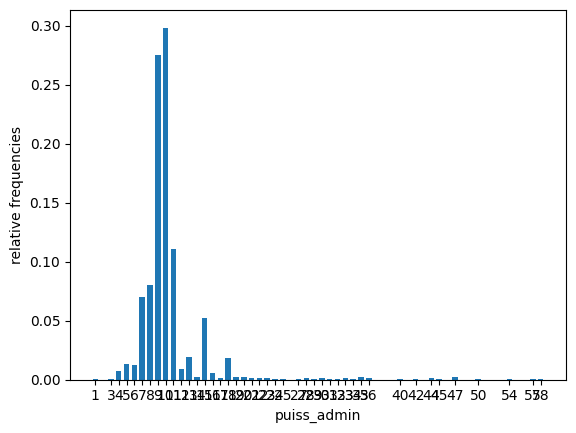

<Figure size 3000x1500 with 0 Axes>

In [22]:
positions = levels

plt.bar(positions, fi, width = 0.7)
plt.xticks(positions, levels) 
plt.ylabel('relative frequencies')
plt.xlabel('puiss_admin')
plt.figure(figsize= (30, 15))
plt.show()

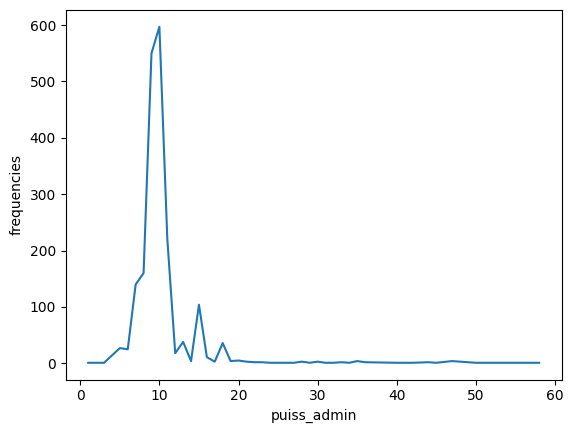

In [23]:
plt.plot(positions, ni)
plt.ylabel('frequencies')
plt.xlabel('puiss_admin')
plt.show()

## Puiss_max visualisation

In [24]:
x = np.array(df['puiss_max'][:])
x

array([ 88.,  95., 120., ..., 100., 100.,  95.], shape=(2000,))

In [25]:
levels, ni = np.unique(x, return_counts = True) 
fi = ni/n
Fi = np.cumsum(fi)
ft = pd.DataFrame(data = np.transpose([ni, fi, Fi]), index = levels, columns = ['frequencies', 'relative frequencies', 'cummulative relative frequencies'])
ft = ft.sort_values(by='frequencies', ascending=False).head(5)
ft

,frequencies,relative frequencies,cummulative relative frequencies
120.0,765.0,0.3825,0.8310
100.0,422.0,0.2110,0.4265
80.0,149.0,0.0745,0.1170
95.0,146.0,0.0730,0.2115
165.0,91.0,0.0455,0.9400


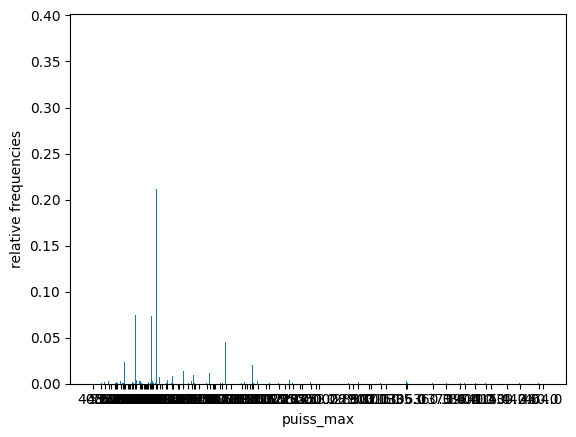

<Figure size 3000x1500 with 0 Axes>

In [26]:
positions = levels

plt.bar(positions, fi, width = 0.7)
plt.xticks(positions, levels) 
plt.ylabel('relative frequencies')
plt.xlabel('puiss_max')
plt.figure(figsize= (30, 15))
plt.tight_layout()
plt.show()

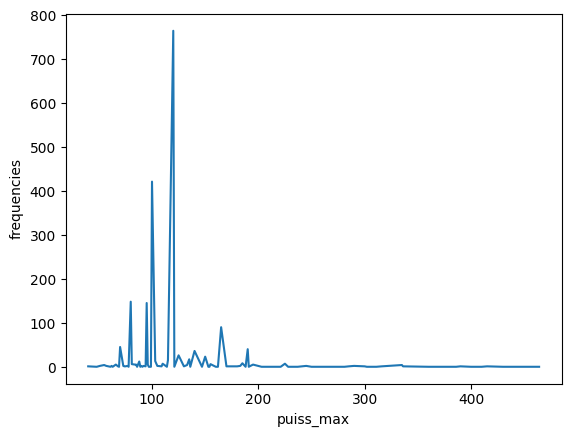

In [27]:
plt.plot(positions, ni)
plt.ylabel('frequencies')
plt.xlabel('puiss_max')
plt.show()

## Cod_cbr visualisation

In [28]:
x = np.array(df['cod_cbr'][:])
x

array(['ES', 'GO', 'GO', ..., 'GO', 'GO', 'GO'],
      shape=(2000,), dtype=object)

In [29]:
levels, ni = np.unique(x, return_counts = True) 
fi = ni/n
ft = pd.DataFrame(data = np.transpose([ni, fi]), index = levels, columns = ['frequencies', 'relative frequencies'])
ft = ft.sort_values(by='frequencies', ascending=False).head(3)

levels = ft.index
ni = ft['frequencies']
ft

,frequencies,relative frequencies
GO,1814.0,0.9070
ES,167.0,0.0835
EH,11.0,0.0055


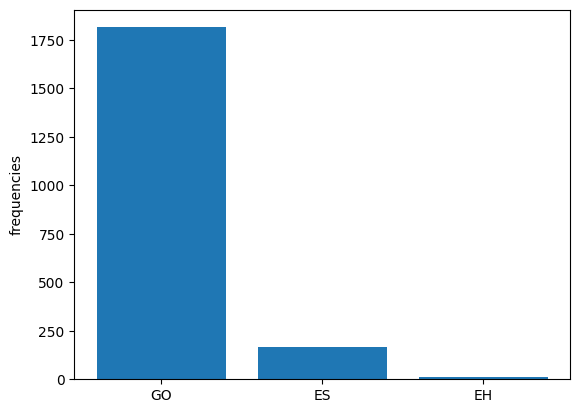

In [30]:
plt.bar(levels, ni)
plt.ylabel('frequencies')
plt.show()

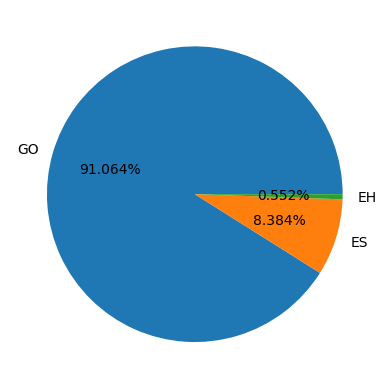

In [31]:
plt.pie(ni, labels = levels, autopct='%1.3f%%')
plt.show()

These are the main cod_cbr on the data set but there exist others such as GP, GN....


## Cnit visualisation 

In [32]:
x = np.array(df['cnit'][:])
x

array(['M10SUZVP0005634', 'M10MCDVPF13A681', 'M10MCDVP0233533', ...,
       'M10MCDVP6044147', 'M10VWGVPE08Z865', 'M10MCDVPU19R263'],
      shape=(2000,), dtype=object)

In [33]:
levels, ni = np.unique(x, return_counts = True) 
fi = ni/n
ft = pd.DataFrame(data = np.transpose([ni, fi]), index = levels, columns = ['frequencies', 'relative frequencies'])
ft = ft.sort_values(by='frequencies', ascending=False)

levels = ft.index
ni = ft['frequencies']
ft

,frequencies,relative frequencies
M1GPSCVP000H633,1.0,0.0005
M10ALFVP0005329,1.0,0.0005
M10ALFVP000C336,1.0,0.0005
M10ALFVP000G304,1.0,0.0005
M10ALFVP000J403,1.0,0.0005
...,...,...
M10AUDVP008T823,1.0,0.0005
M10AUDVP0094190,1.0,0.0005
M10AUDVP009J169,1.0,0.0005
M10AUDVP009X377,1.0,0.0005


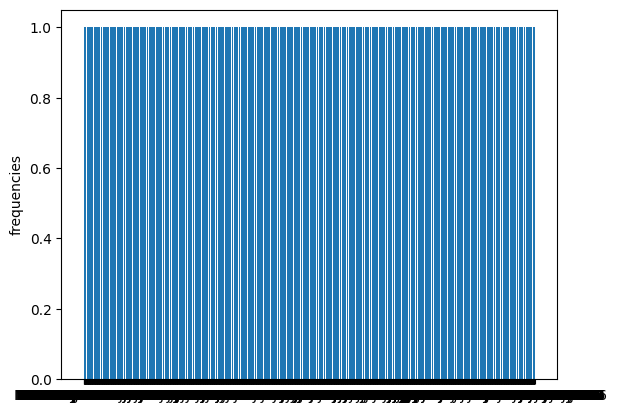

In [34]:
plt.bar(levels, ni)
plt.ylabel('frequencies')
plt.show()

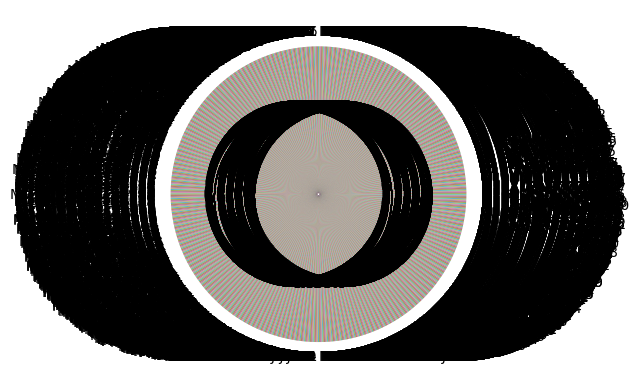

In [35]:
plt.pie(ni, labels = levels, autopct='%1.3f%%')
plt.show()

Those are The `IDs` of the car so it's normal that they all have the same frequency . Its not relevant to do further anlysis for this variable


## lib_mrq visualisation 

In [36]:
x = np.array(df['lib_mrq'][:]) 
x

array(['SUZUKI', 'MERCEDES', 'MERCEDES', ..., 'MERCEDES', 'VOLKSWAGEN',
       'MERCEDES'], shape=(2000,), dtype=object)

In [37]:
levels, ni = np.unique(x, return_counts = True) 
levels, ni, sum(ni)
n = len(df)
fi = ni/n
fi, sum(fi)
ft_cartel = pd.DataFrame(data = np.transpose([ni, fi]), index = levels, columns = ['Frequencies', 'Relative Frequencies'])
ft_cartel

,Frequencies,Relative Frequencies
ALFA-ROMEO,6.0,0.0030
AUDI,12.0,0.0060
BENTLEY,1.0,0.0005
BMW,13.0,0.0065
CADILLAC,2.0,0.0010
CHEVROLET,3.0,0.0015
CITROEN,4.0,0.0020
DACIA,1.0,0.0005
FERRARI,1.0,0.0005
FIAT,18.0,0.0090


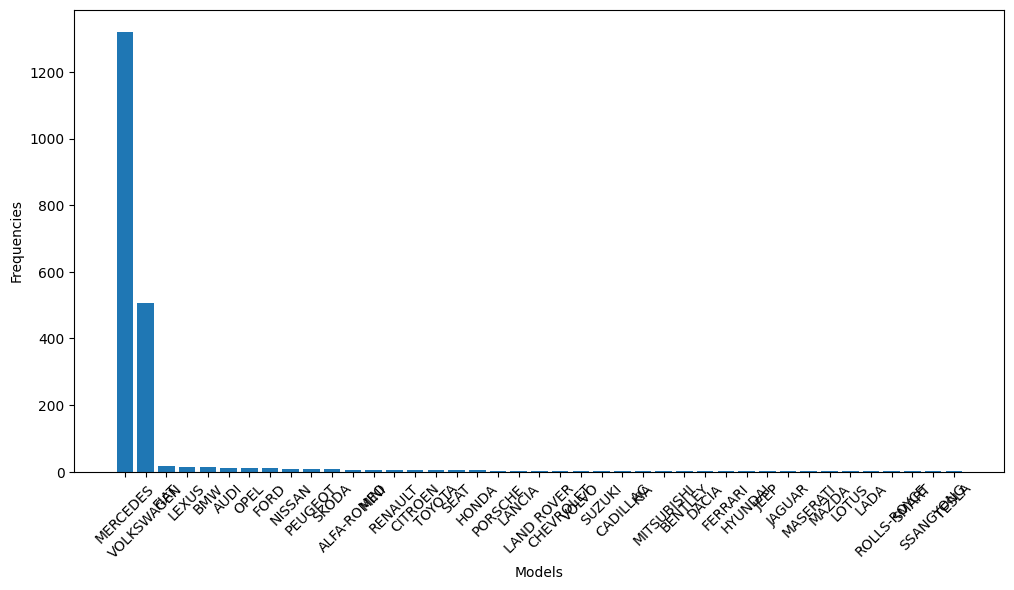

In [38]:
ft_cartel = ft_cartel.sort_values(by='Frequencies', ascending=False)
plt.figure(figsize=(12, 6)) 
plt.bar(ft_cartel.index, ft_cartel['Frequencies'])
plt.ylabel('Frequencies')
plt.xlabel('Models')
plt.xticks(rotation=45) 
plt.show()

There are a lot of existing models in this dataset i will take only the most relevent ones the `TOP 3 `

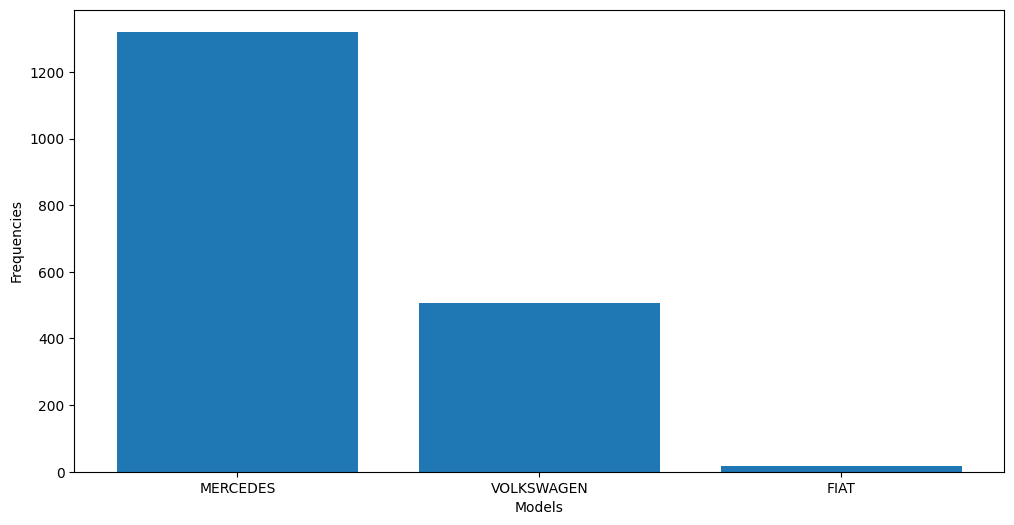

In [39]:

ft_cartel = ft_cartel.sort_values(by='Frequencies', ascending=False).head(3)
plt.figure(figsize=(12, 6)) 
plt.bar(ft_cartel.index, ft_cartel['Frequencies'])
plt.ylabel('Frequencies')
plt.xlabel('Models')
plt.show()

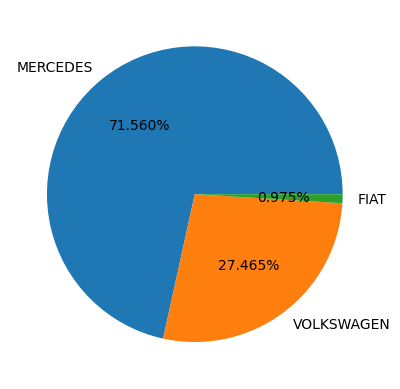

In [40]:
plt.pie(ft_cartel['Frequencies'], labels=ft_cartel.index, autopct='%1.3f%%')
plt.show()

We can see that the `MERCEDES` brand is the most common used followed by `Wolkswagen`

## lib_mod Visualisation

In [41]:
x = np.array(df['lib_mod'][:]) 
x

array(['SX4', 'SPRINTER', 'VIANO', ..., 'VIANO', 'CRAFTER', 'SPRINTER'],
      shape=(2000,), dtype=object)

In [42]:
levels, ni = np.unique(x, return_counts = True) 
levels, ni, sum(ni)
n = len(df)

fi = ni/n
fi, sum(fi)
ft_cartel = pd.DataFrame(data = np.transpose([ni, fi]), index = levels, columns = ['Frequencies', 'Relative Frequencies'])
ft_cartel

,Frequencies,Relative Frequencies
118,2.0,0.0010
120,1.0,0.0005
125,1.0,0.0005
159,1.0,0.0005
3,1.0,0.0005
...,...,...
XC70,1.0,0.0005
XF,1.0,0.0005
YARIS,1.0,0.0005
YPSILON,1.0,0.0005


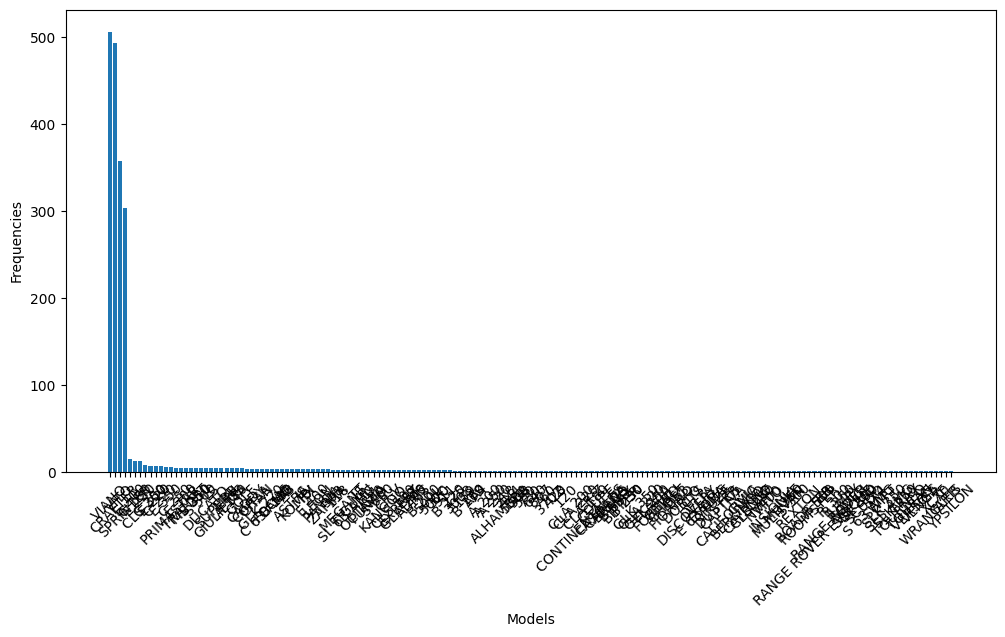

In [43]:
ft_cartel = ft_cartel.sort_values(by='Frequencies', ascending=False)
plt.figure(figsize=(12, 6)) 
plt.bar(ft_cartel.index, ft_cartel['Frequencies'])
plt.ylabel('Frequencies')
plt.xlabel('Models')
plt.xticks(rotation=45) 
 
plt.show()

There are a lot of existing models in this dataset i will take only the most relevent ones the `TOP 4 `

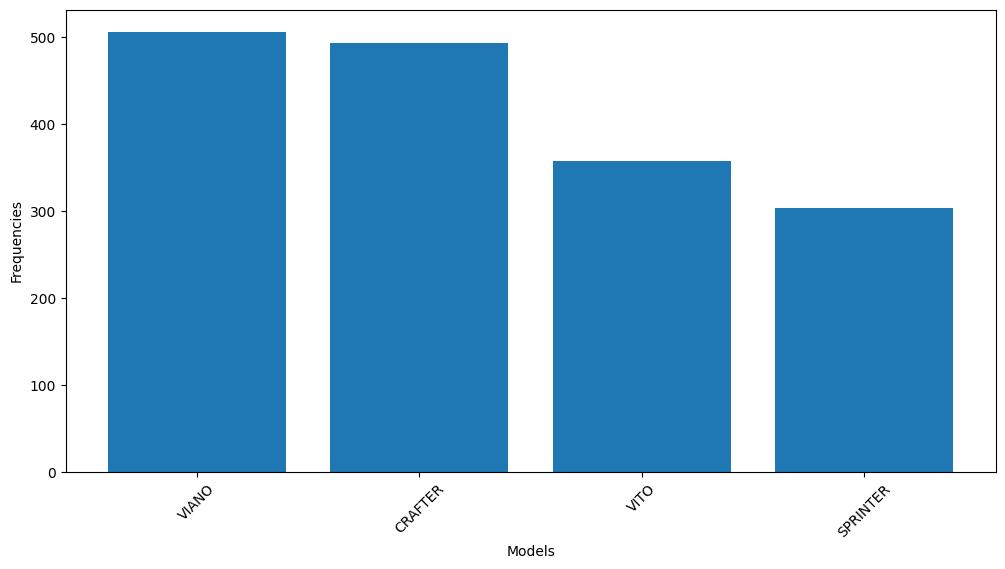

In [44]:
ft_cartel = ft_cartel.sort_values(by='Frequencies', ascending=False).head(4)
plt.figure(figsize=(12, 6)) 
plt.bar(ft_cartel.index, ft_cartel['Frequencies'])
plt.ylabel('Frequencies')
plt.xlabel('Models')
plt.xticks(rotation=45) 
 
plt.show()

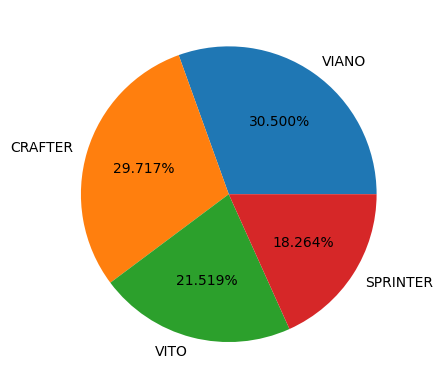

In [45]:
plt.pie(ft_cartel['Frequencies'], labels=ft_cartel.index, autopct='%1.3f%%')
plt.show()

We can see from this graph that ``Mercedes`` and ``Volkswagen`` remain in the race, with ``Volkswagen``'s ``Crafter`` as the most used model, followed by ``Mercedes``'s ``Vito``, ``Viano``, and ``Sprinter``

## Co2 Visualisation

In [46]:
x = np.array(df['co2'][:])
min(x), max(x)
bins = np.array([0.,150,200,210,225,250,300,400])
bins, len (bins)
ni, bins = np.histogram(x, bins = bins)
lo = bins[:-1]
hi = bins[1:]
fi = ni/n
Fi = np.cumsum(fi)
ft_quant = pd.DataFrame(data = np.transpose([lo, hi, ni, fi, Fi]), columns = ['lo', 'hi', 'frequencies', 'relative frequencies', 'cummulative relative frequencies'])
ft_quant

,lo,hi,frequencies,relative frequencies,cummulative relative frequencies
0,0.0,150.0,202.0,0.1010,0.1010
1,150.0,200.0,546.0,0.2730,0.3740
2,200.0,210.0,467.0,0.2335,0.6075
3,210.0,225.0,529.0,0.2645,0.8720
4,225.0,250.0,192.0,0.0960,0.9680
5,250.0,300.0,57.0,0.0285,0.9965
6,300.0,400.0,6.0,0.0030,0.9995


### Detecting outliers in the CO2 column

In [47]:

Q1 = df['co2'].quantile(0.25)
Q3 = df['co2'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['co2'] < lower_bound) | (df['co2'] > upper_bound)]
print(f"Number of outliers in 'co2': {len(outliers)}")

df_cleaned = df[(df['co2'] >= lower_bound) & (df['co2'] <= upper_bound)]


Number of outliers in 'co2': 287


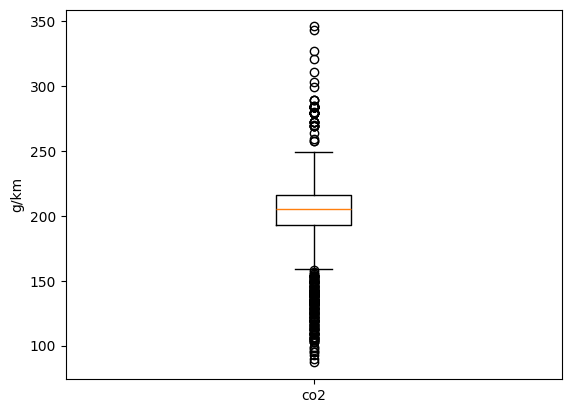

In [48]:
x = x[x > 0]
plt.boxplot(x)
plt.ylabel('g/km')
plt.xticks([1], ['co2'])
plt.show()


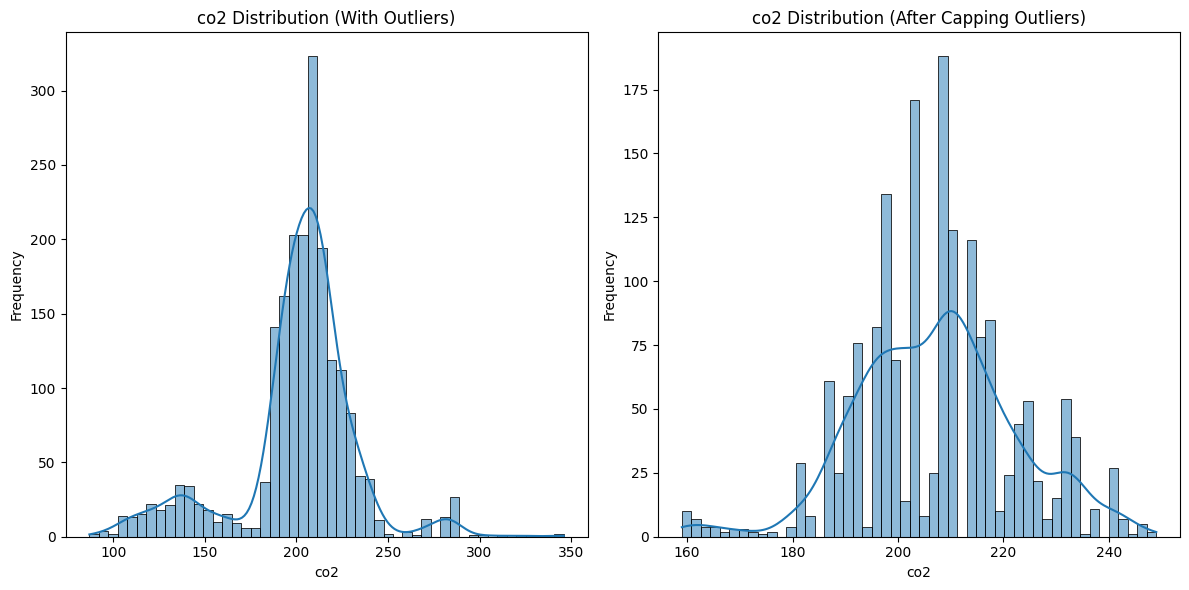

In [49]:
# Before handling outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['co2'], bins=50, kde=True)
plt.title('co2 Distribution (With Outliers)')
plt.xlabel('co2')
plt.ylabel('Frequency')

# After handling outliers (using capped data)
plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['co2'], bins=50, kde=True)
plt.title('co2 Distribution (After Capping Outliers)')
plt.xlabel('co2')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

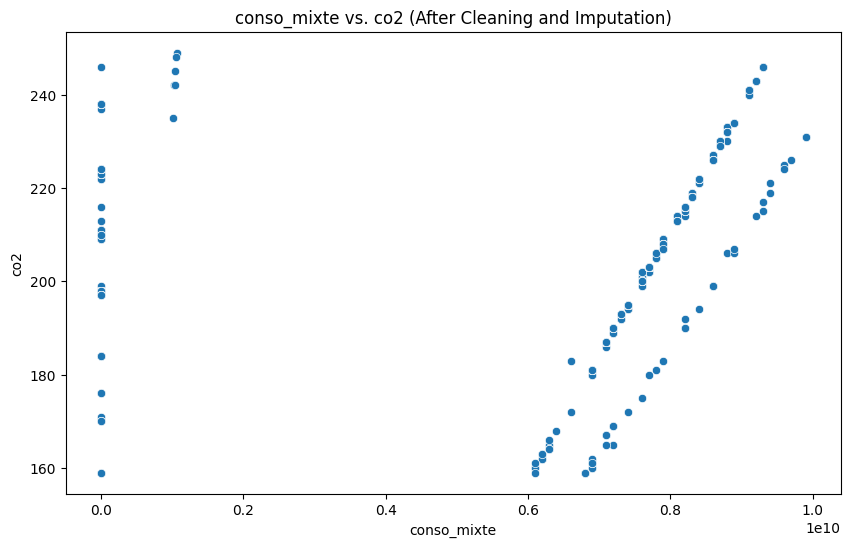

In [50]:
# co2 vs. conso_mixte
plt.figure(figsize=(10, 6))
sns.scatterplot(x='conso_mixte', y='co2', data=df_cleaned)
plt.title('conso_mixte vs. co2 (After Cleaning and Imputation)')
plt.xlabel('conso_mixte')
plt.ylabel('co2')
plt.show()

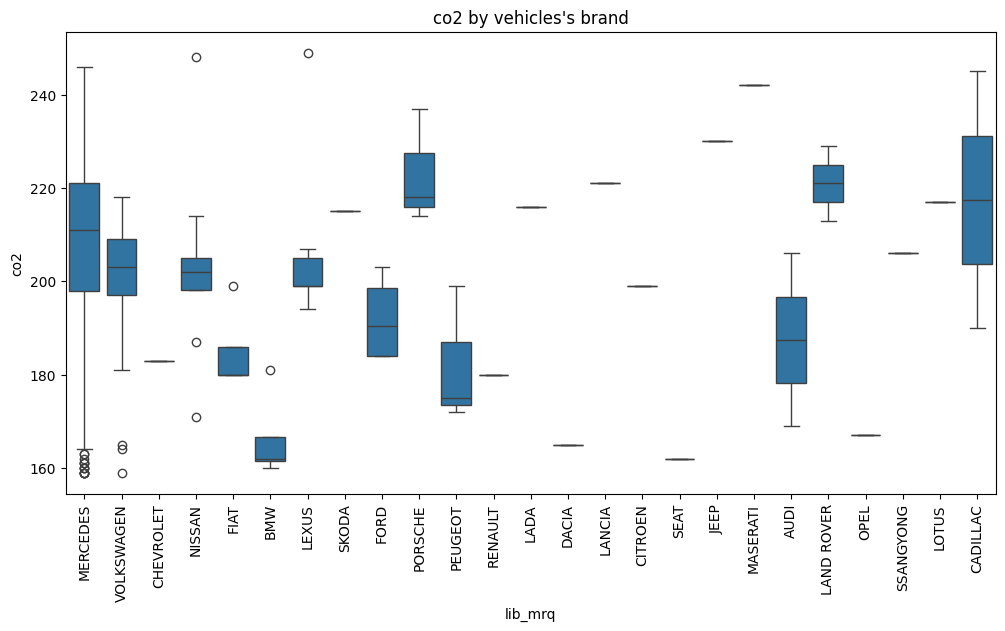

In [51]:
# co2 by lib_mrq
plt.figure(figsize=(12, 6))
sns.boxplot(x='lib_mrq', y='co2', data=df_cleaned)
plt.title("co2 by vehicles's brand")
plt.xlabel('lib_mrq')
plt.ylabel('co2')
plt.xticks(rotation=90)
plt.show()

## masse_ordma_max Visualisation

In [52]:
x = np.array(df['masse_ordma_max'][:])
min(x), max(x)
bins = np.array([0.,1500,2000,2500,2750,3200])
bins, len (bins)
ni, bins = np.histogram(x, bins = bins)
lo = bins[:-1]
hi = bins[1:]
fi = ni/n
Fi = np.cumsum(fi)
ft_quant = pd.DataFrame(data = np.transpose([lo, hi, ni, fi, Fi]), columns = ['lo', 'hi', 'frequencies', 'relative frequencies', 'cummulative relative frequencies'])
ft_quant

,lo,hi,frequencies,relative frequencies,cummulative relative frequencies
0,0.0,1500.0,99.0,0.0495,0.0495
1,1500.0,2000.0,184.0,0.0920,0.1415
2,2000.0,2500.0,863.0,0.4315,0.5730
3,2500.0,2750.0,378.0,0.1890,0.7620
4,2750.0,3200.0,476.0,0.2380,1.0000


In [53]:
Q1 = df['masse_ordma_max'].quantile(0.25)
Q3 = df['masse_ordma_max'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['masse_ordma_max'] < lower_bound) | (df['masse_ordma_max'] > upper_bound)]
print(f"Number of outliers in 'masse_ordma_max': {len(outliers)}")

df_cleaned = df[(df['masse_ordma_max'] >= lower_bound) & (df['masse_ordma_max'] <= upper_bound)]


Number of outliers in 'masse_ordma_max': 6


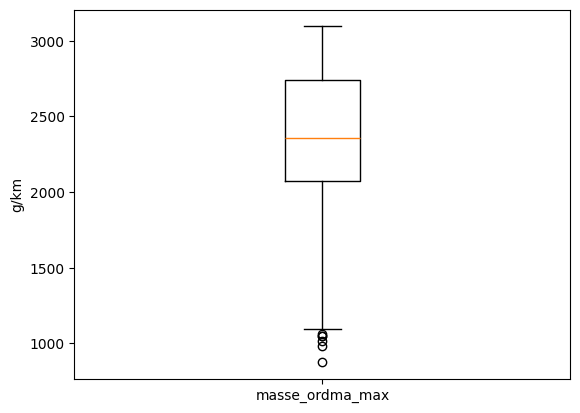

In [54]:
plt.boxplot(x)
plt.ylabel('g/km')
plt.xticks([1], ['masse_ordma_max'])
plt.show()


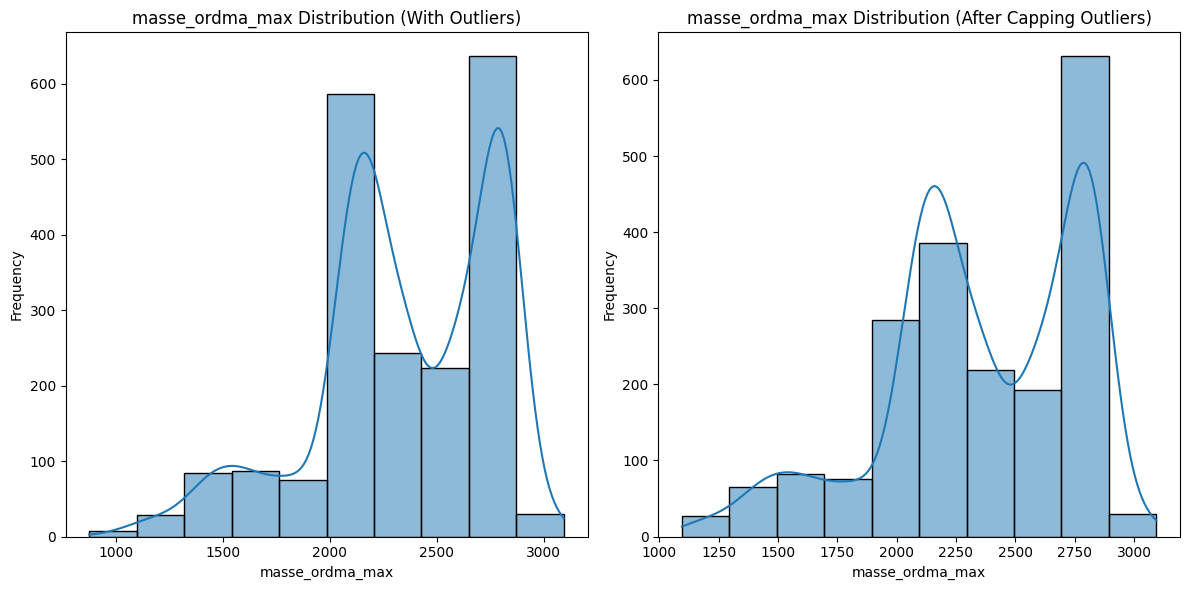

In [55]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['masse_ordma_max'], bins=10, kde=True)
plt.title('masse_ordma_max Distribution (With Outliers)')
plt.xlabel('masse_ordma_max')
plt.ylabel('Frequency')

# After handling outliers (using capped data)
plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['masse_ordma_max'], bins=10, kde=True)
plt.title('masse_ordma_max Distribution (After Capping Outliers)')
plt.xlabel('masse_ordma_max')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## hybride Visualisation

In [56]:
n=len(df)
x = np.array(df['hybride'][:]) 
levels, ni = np.unique(x, return_counts = True) 
levels, ni, sum(ni)

(array(['non', 'oui'], dtype=object), array([1987,   13]), np.int64(2000))

In [57]:
fi = ni/n
fi, sum(fi)

(array([0.9935, 0.0065]), np.float64(1.0))

In [58]:
ft_hybride = pd.DataFrame(data = np.transpose([ni, fi]), index = levels, columns = ['frequencies', 'relative frequencies'])
ft_hybride

,frequencies,relative frequencies
non,1987.0,0.9935
oui,13.0,0.0065


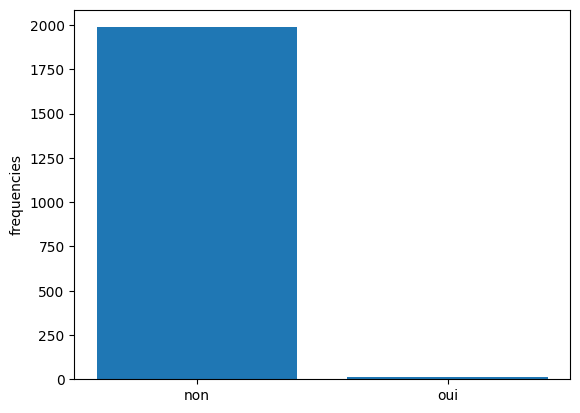

In [59]:
plt.bar(levels, ni)
plt.ylabel('frequencies')
plt.show()

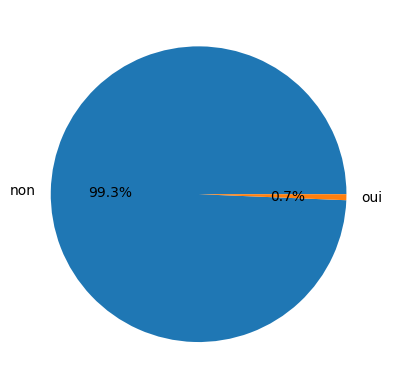

In [60]:
plt.pie(ni, labels = levels, autopct='%1.1f%%')
plt.show()

That means that the majority of the vehicles of the dataset are not hybrid.

## conso_mixte Visualisation

In [61]:
x0 = np.array(df['conso_mixte'][:])
min(x0), max(x0)
bins = np.linspace(0, 100, 21) 
bins, len (bins)

(array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 21)

In [62]:
bins = np.array([  0.,   5.,6,7,8,8.25,  10.,  15.])
ni0 = np.histogram(x0, bins = bins)[0]  
ni0

array([  2,   8,   6,   5, 220,  10,   3])

In [63]:
lo = bins[:-1]
hi = bins[1:]
fi0 = ni0/n
Fi0 = np.cumsum(fi0)
ft_conso_mixte = pd.DataFrame(data = np.transpose([lo, hi, ni0, fi0, Fi0]), columns = ['lo', 'hi', 'frequencies', 'relative frequencies', 'cummulative relative frequencies'])
ft_conso_mixte

,lo,hi,frequencies,relative frequencies,cummulative relative frequencies
0,0.00,5.00,2.0,0.0010,0.0010
1,5.00,6.00,8.0,0.0040,0.0050
2,6.00,7.00,6.0,0.0030,0.0080
3,7.00,8.00,5.0,0.0025,0.0105
4,8.00,8.25,220.0,0.1100,0.1205
5,8.25,10.00,10.0,0.0050,0.1255
6,10.00,15.00,3.0,0.0015,0.1270


Text(0, 0.5, 'Frequency')

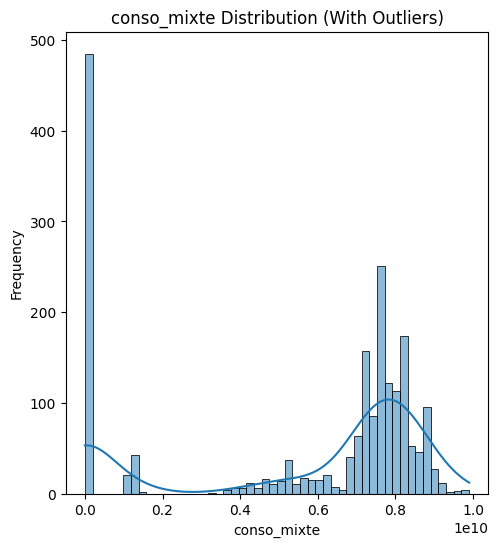

In [64]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['conso_mixte'], bins=50, kde=True)
plt.title('conso_mixte Distribution (With Outliers)')
plt.xlabel('conso_mixte')
plt.ylabel('Frequency')

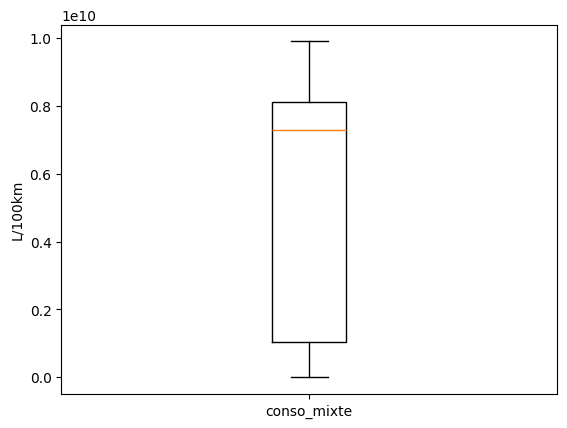

In [65]:
x0 = x0[x0 > 0]
plt.boxplot(x0)
plt.ylabel('L/100km')
plt.xticks([1], ['conso_mixte'])
plt.show()

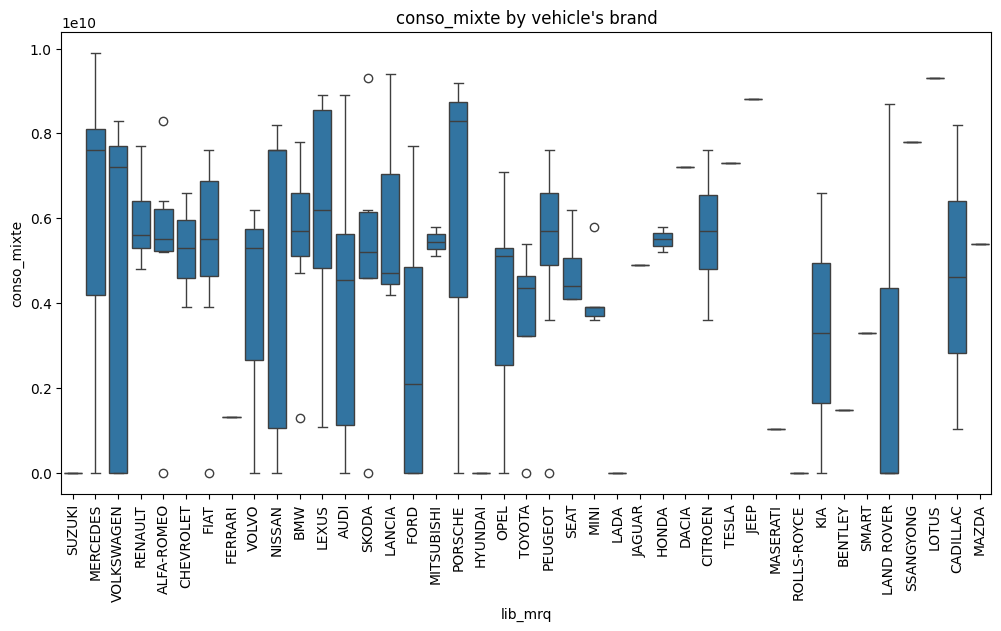

In [66]:
# conso_mixte by lib_mrq
plt.figure(figsize=(12, 6))
sns.boxplot(x='lib_mrq', y='conso_mixte', data=df)
plt.title("conso_mixte by vehicle's brand")
plt.xlabel('lib_mrq')
plt.ylabel('conso_mixte')
plt.xticks(rotation=90)
plt.show()

## typ_boite_nb_rapp Visualisation

In [67]:
x1 = np.array(df['typ_boite_nb_rapp'][:]) 
levels, ni = np.unique(x1, return_counts = True) 
levels, ni, sum(ni)

(array(['A 4', 'A 5', 'A 6', 'A 7', 'A 8', 'A 9', 'D 5', 'D 6', 'D 7',
        'M 5', 'M 6', 'M 7', 'N 1', 'V 0'], dtype=object),
 array([   1,  480,   29,  245,   19,    3,    1,    1,    1,   37, 1170,
           1,    1,   11]),
 np.int64(2000))

In [68]:
fi = ni/n
fi, sum(fi)

(array([5.000e-04, 2.400e-01, 1.450e-02, 1.225e-01, 9.500e-03, 1.500e-03,
        5.000e-04, 5.000e-04, 5.000e-04, 1.850e-02, 5.850e-01, 5.000e-04,
        5.000e-04, 5.500e-03]),
 np.float64(0.9999999999999999))

In [69]:
ft_typ_boite_nb_rapp = pd.DataFrame(data = np.transpose([ni, fi]), index = levels, columns = ['frequencies', 'relative frequencies'])
ft_typ_boite_nb_rapp

,frequencies,relative frequencies
A 4,1.0,0.0005
A 5,480.0,0.2400
A 6,29.0,0.0145
A 7,245.0,0.1225
A 8,19.0,0.0095
A 9,3.0,0.0015
D 5,1.0,0.0005
D 6,1.0,0.0005
D 7,1.0,0.0005
M 5,37.0,0.0185


In [70]:
ft_typ_boite_nb_rapp.sort_values(by='frequencies', ascending=False)

ft_typ_boite_nb_rapp=ft_typ_boite_nb_rapp.head(4)
levels = ft_typ_boite_nb_rapp.index
ni = ft_typ_boite_nb_rapp['frequencies']
ft_typ_boite_nb_rapp

,frequencies,relative frequencies
A 4,1.0,0.0005
A 5,480.0,0.2400
A 6,29.0,0.0145
A 7,245.0,0.1225


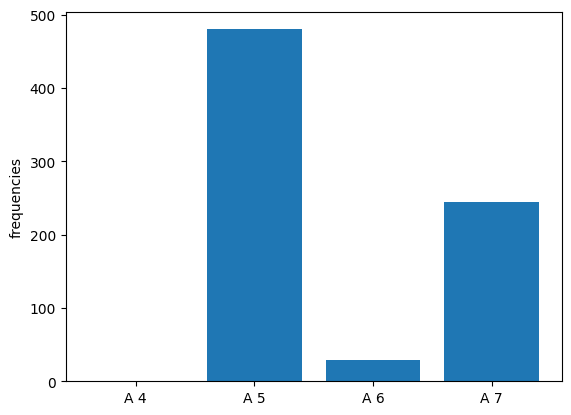

In [71]:
plt.bar(levels, ni)
plt.ylabel('frequencies')
plt.show()

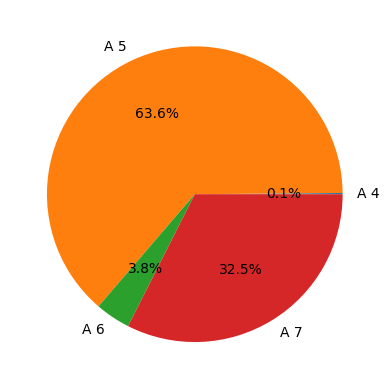

In [72]:
plt.pie(ni, labels = levels, autopct='%1.1f%%')
plt.show()

It seems like the majority of the vehicles of this dataset are of manual transmission with 6 gears.

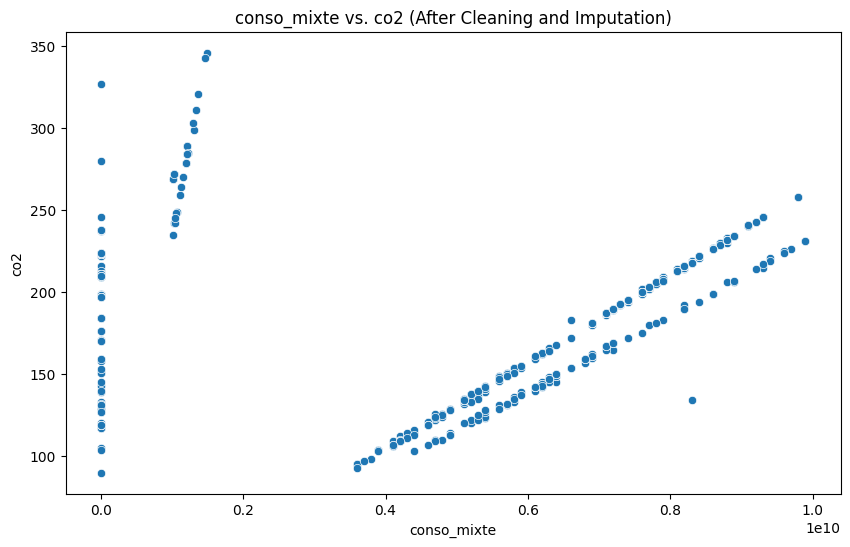

In [73]:
# co2 vs. conso_mixte
plt.figure(figsize=(10, 6))
sns.scatterplot(x='conso_mixte', y='co2', data=df_cleaned)
plt.title('conso_mixte vs. co2 (After Cleaning and Imputation)')
plt.xlabel('conso_mixte')
plt.ylabel('co2')
plt.show()

### Multivariate analysis

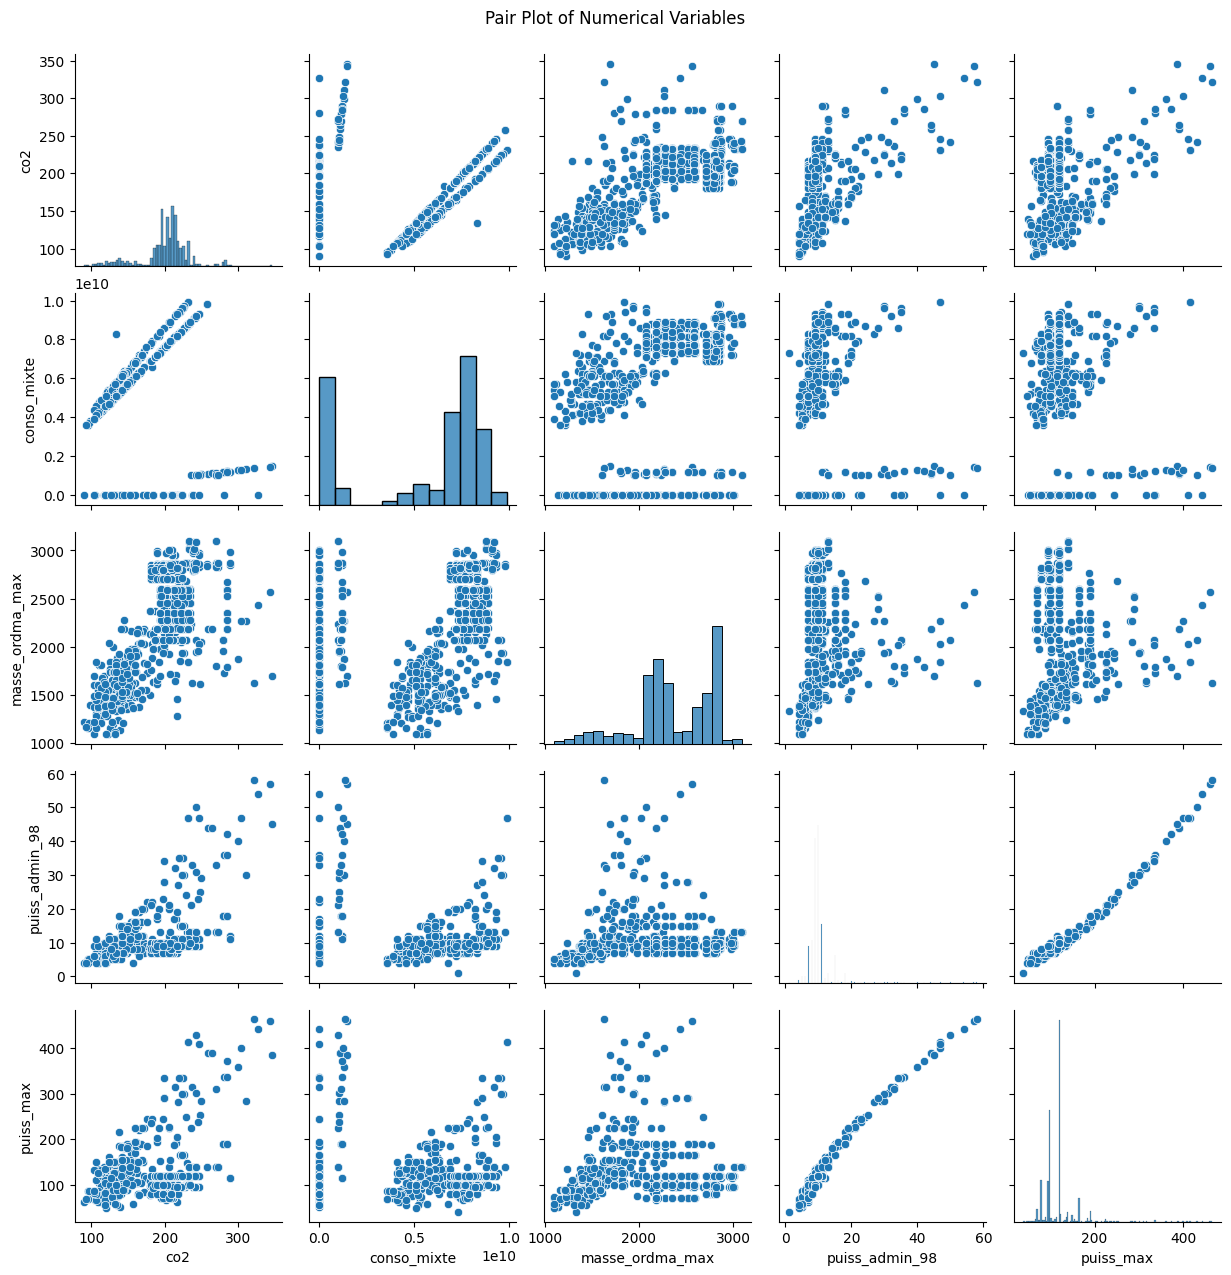

In [74]:
# Select numerical columns for pair plot
numerical_columns = ['co2', 'conso_mixte', 'masse_ordma_max', 'puiss_admin_98', 'puiss_max']

# Create pair plot
sns.pairplot(df_cleaned[numerical_columns])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

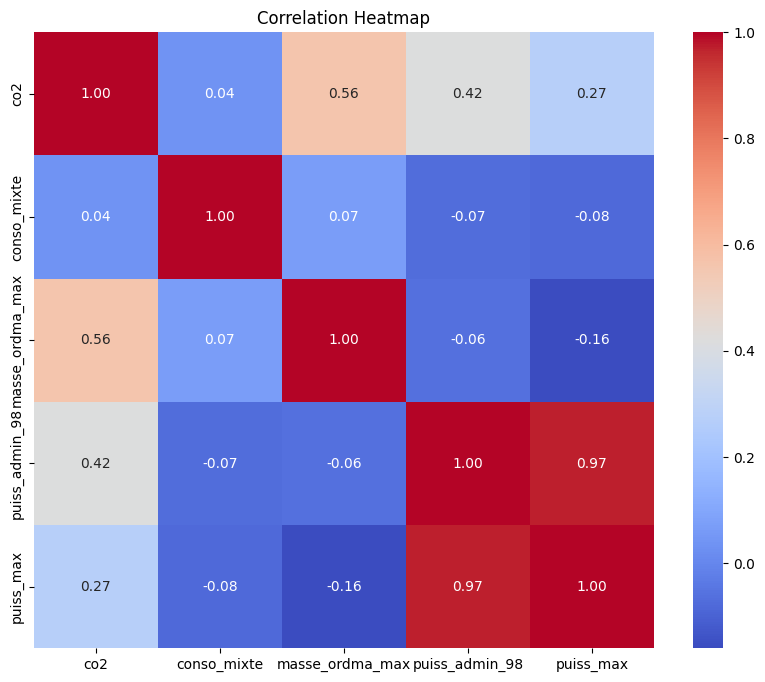

In [75]:
# Calculate correlation matrix
corr_matrix = df_cleaned[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()